In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df = pd.read_csv('ex1data1.txt')
df.head(10)

,6.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860
5,7.4764,4.3483
6,8.5781,12.0000
7,6.4862,6.5987
8,5.0546,3.8166
9,5.7107,3.2522


In [32]:
def costfunction(x1,y1,theta):
    x2=x1[:]
    m=len(x2[:,0])
    J = 0
    if (x2[:,0] != np.ones((m,1),int)).all():
        x2 = np.concatenate([np.ones((m,1),int),x2],axis=1)
    J = (1/(2*m))*sum((x2@theta - y1)**2) #+ (ld/(2*m))*sum(theta**2)
    return J[0]

In [39]:
def gradientdescent(x1,y,theta,lr,maxiter):
    x=x1[:]
    m=len(x[:,0])
    if (x[:,0] != np.ones((m,1),int)).all():
        x = np.concatenate([np.ones((m,1),int),x],axis=1)
    jhist = []
    jind =[]
    i=0
    while i < maxiter:
        theta = theta - (lr/m)*(x.T@((x@theta-y)))
        jhist.append(costfunction(x,y,theta))
        jind.append(i)
        i=i+1
    return theta,jhist,jind

In [40]:
def predict(x,theta):
    m=len(x[:,0])
    if (x[:,0] != np.ones((m,1),int)).all():
        x = np.concatenate([np.ones((m,1),int),x],axis=1)
    return x@theta

In [6]:
def normalise(x):
    n = len(x[0,:])
    i=0
    while i<n:
        x[:,i] = (x[:,i] - np.mean(x[:,i]))/x[:,i].std()
        i=i+1

In [36]:
x = np.array(df[['6.1101']])
y = np.array(df[['17.592']])
theta = np.ones((len(x[0,:])+1,1))
#normalise(x)
#normalise(y)
#x = np.concatenate([np.ones((1460,1),int),x],axis=1)

In [37]:
print(x)
print(theta)
print(y)

[[ 5.5277]
 [ 8.5186]
 [ 7.0032]
 [ 5.8598]
 [ 8.3829]
 [ 7.4764]
 [ 8.5781]
 [ 6.4862]
 [ 5.0546]
 [ 5.7107]
 [14.164 ]
 [ 5.734 ]
 [ 8.4084]
 [ 5.6407]
 [ 5.3794]
 [ 6.3654]
 [ 5.1301]
 [ 6.4296]
 [ 7.0708]
 [ 6.1891]
 [20.27  ]
 [ 5.4901]
 [ 6.3261]
 [ 5.5649]
 [18.945 ]
 [12.828 ]
 [10.957 ]
 [13.176 ]
 [22.203 ]
 [ 5.2524]
 [ 6.5894]
 [ 9.2482]
 [ 5.8918]
 [ 8.2111]
 [ 7.9334]
 [ 8.0959]
 [ 5.6063]
 [12.836 ]
 [ 6.3534]
 [ 5.4069]
 [ 6.8825]
 [11.708 ]
 [ 5.7737]
 [ 7.8247]
 [ 7.0931]
 [ 5.0702]
 [ 5.8014]
 [11.7   ]
 [ 5.5416]
 [ 7.5402]
 [ 5.3077]
 [ 7.4239]
 [ 7.6031]
 [ 6.3328]
 [ 6.3589]
 [ 6.2742]
 [ 5.6397]
 [ 9.3102]
 [ 9.4536]
 [ 8.8254]
 [ 5.1793]
 [21.279 ]
 [14.908 ]
 [18.959 ]
 [ 7.2182]
 [ 8.2951]
 [10.236 ]
 [ 5.4994]
 [20.341 ]
 [10.136 ]
 [ 7.3345]
 [ 6.0062]
 [ 7.2259]
 [ 5.0269]
 [ 6.5479]
 [ 7.5386]
 [ 5.0365]
 [10.274 ]
 [ 5.1077]
 [ 5.7292]
 [ 5.1884]
 [ 6.3557]
 [ 9.7687]
 [ 6.5159]
 [ 8.5172]
 [ 9.1802]
 [ 6.002 ]
 [ 5.5204]
 [ 5.0594]
 [ 5.7077]
 [ 7.6366]

In [41]:

cf = costfunction(x,y,theta)
print(cf)

9.801222644366666


In [55]:
lr = 0.01
maxiter = 2500
nth,jh,ji = gradientdescent(x,y,theta,lr,maxiter)

In [56]:
nth

array([[-4.15502565],
       [ 1.20789049]])

In [21]:
print(jh)

[6.015548482334973, 5.893479543909728, 5.881312413686843, 5.872471918759161, 5.863761774029168, 5.8550860129919196, 5.846441647655905, 5.837828478838884, 5.829246391390012, 5.820695273072514, 5.812175012129555, 5.803685497209838, 5.795226617363944, 5.786798262042831, 5.778400321096381, 5.770032684771962, 5.761695243712994, 5.753387888957514, 5.745110511936759, 5.736863004473751, 5.728645258781861, 5.720457167463438, 5.712298623508362, 5.704169520292689, 5.696069751577217, 5.687999211506129, 5.679957794605586, 5.6719453957823704, 5.663961910322499, 5.656007233889849, 5.648081262524807, 5.640183892642913, 5.632315021033495, 5.624474544858321, 5.616662361650263, 5.60887836931195, 5.6011224661144405, 5.593394550695884, 5.5856945220602165, 5.578022279575812, 5.570377722974181, 5.562760752348673, 5.55517126815315, 5.5476091712006905, 5.540074362662306, 5.532566744065628, 5.525086217293649, 5.517632684583409, 5.510206048524747, 5.502806212059005, 5.495433078477767, 5.488086551421604, 5.480766

In [57]:
cf1 = costfunction(x,y,nth)
print(cf1)

3.459872819047869


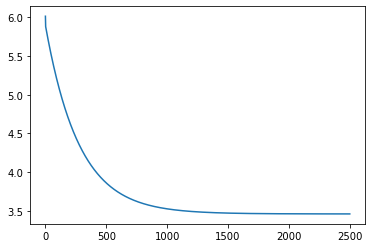

In [58]:
plt.plot(ji,jh)

In [24]:
theta

array([[1.],
       [1.]])

In [25]:
x[0:5]

array([[5.5277],
       [8.5186],
       [7.0032],
       [5.8598],
       [8.3829]])

In [59]:
op = predict(x,nth)

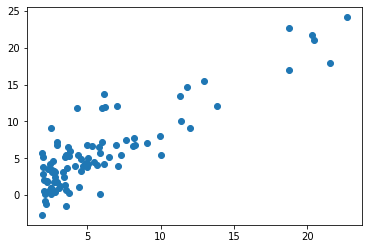

In [60]:
plt.scatter(op,y)